In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
clean_earthquake = pd.read_csv('../dq3-earthquakes-down-to-earth/cleanfilter.csv')

In [3]:
clean_earthquake

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0,NaN,NaN,NaN,NaN,NaN,0,0.0
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9,NaN,NaN,NaN,140.0,NaN,0,140.0
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7,NaN,NaN,NaN,NaN,NaN,0,0.0
3,1901-02-15 00:00,China,26.000,100.100,0,6.5,NaN,NaN,NaN,NaN,NaN,0,0.0
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4,NaN,NaN,NaN,4.0,NaN,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2011-03-24 20:25,Burma,NaN,NaN,NaN,6.8,NaN,NaN,NaN,NaN,NaN,150,150.0
1239,2011-04-07 14:32,Japan,38.2,140.0,66.0,7.1,NaN,NaN,NaN,NaN,NaN,0,0.0
1240,2011-09-18 12:40,India,27.723,88.064,19.7,6.9,L,NaN,NaN,NaN,NaN,111,111.0
1241,2011-09-23 10:41,Turkey,38.6,43.5,7.2,7.1,NaN,NaN,NaN,NaN,NaN,601,601.0


In [4]:
clean_earthquake['Present-day country and link to Wikipedia article'].value_counts()

China         152
Indonesia      95
Iran           86
Japan          82
Turkey         82
             ... 
Mandatory       1
Honduras        1
Montenegro      1
France          1
Rwanda          1
Name: Present-day country and link to Wikipedia article, Length: 101, dtype: int64

In [5]:
country_deaths = clean_earthquake.groupby('Present-day country and link to Wikipedia article').agg(sum).sort_values(by='Deaths',ascending=False).reset_index()

In [6]:
country_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 8 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Present-day country and link to Wikipedia article  101 non-null    object 
 1   Magnitude                                          101 non-null    float64
 2   PDE Shaking Deaths                                 101 non-null    float64
 3   PDE Total Deaths                                   101 non-null    float64
 4   Utsu Total Deaths                                  101 non-null    float64
 5   EM-DAT Total Deaths                                101 non-null    float64
 6   Other Source Deaths                                101 non-null    int64  
 7   Deaths                                             101 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 6.4+ KB


In [16]:
country_deaths = country_deaths.drop(['Magnitude','PDE Shaking Deaths','PDE Total Deaths','Utsu Total Deaths','EM-DAT Total Deaths','Other Source Deaths'], axis=1)

In [18]:
country_deaths=country_deaths[country_deaths['Deaths']>1]
country_deaths

,Present-day country and link to Wikipedia article,Deaths
0,China,1141794.0
1,Indonesia,343300.0
2,Haiti,222523.0
3,Japan,182920.0
4,Iran,160649.0
...,...,...
80,Uganda,8.0
81,Wallis,5.0
82,US,5.0
83,Mozambique,4.0


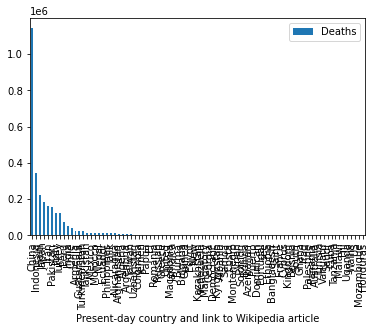

In [21]:
country_deaths.plot(kind='bar', x='Present-day country and link to Wikipedia article',y='Deaths')

In [23]:
clean_earthquake.groupby('Present-day country and link to Wikipedia article').agg('mean')

,Magnitude,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,Deaths
Present-day country and link to Wikipedia article,,,,,,,
Afghanistan,6.258621,321.520000,329.240000,423.090909,508.222222,0.0,321.862069
Albania,6.016667,1.000000,1.000000,36.500000,4.000000,0.0,36.500000
Algeria,5.883333,625.583333,625.666667,462.166667,711.888889,0.0,518.166667
Argentina,6.645455,19.250000,19.500000,858.300000,5003.000000,0.0,780.363636
Armenia,6.500000,25000.000000,25000.000000,12695.000000,25000.000000,0.0,12695.000000
...,...,...,...,...,...,...,...
Venezuela,6.436364,1.833333,2.000000,51.285714,120.500000,0.0,32.818182
Vietnam,5.300000,1.000000,1.000000,NaN,NaN,0.0,1.000000
Wallis,6.300000,5.000000,5.000000,5.000000,5.000000,0.0,5.000000
